## Assignment-03 First Step of Machine Learning: Model and Evaluation

同学们，今天我们的学习了基本的机器学习概念，相比你已经对机器学习的这些方法有一个基本的认识了。值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

## Part-1 Programming Review 编程回顾

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

<评阅点>： 
> + 是否完成线性回归模型 (4')
+ 能够进行预测新数据(3')
+ 能够进行可视化操作(3')

In [4]:
# you code here
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import random
%matplotlib inline


In [2]:
random_data = np.random.random((30,2))

In [3]:
X = random_data[:,0]
y = random_data[:,1]

In [36]:
def func(X):
    return 7.3*X + 9 + random.randint(-2,2)

In [38]:
y = [func(x) for x in X]

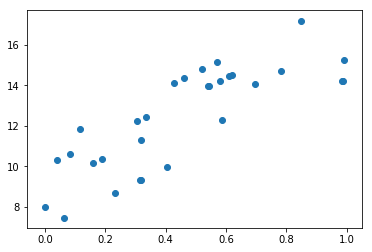

In [39]:
plt.scatter(X,y)

In [44]:
reg = LinearRegression().fit(X.reshape(-1,1),y)

In [46]:
reg.score(X.reshape(-1,1),y)

0.6541092842544374

In [48]:
y_pred = reg.predict(X.reshape(-1,1))

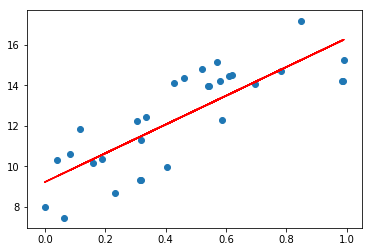

In [54]:
plt.scatter(X,y)
plt.plot(X,y_pred,color = 'r')

#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

<评阅点>:
> + 是否完成了KNN模型 (4')
+ 是否能够预测新的数据 (4')

In [56]:
from scipy.spatial.distance import cosine

In [57]:
# you code here
def model(X,y):
    return [(Xi,yi) for Xi,yi in zip(X,y)]

In [58]:
def distance(x1,x2):
    return cosine(x1,x2)

In [64]:
def predict(x, k=5):
    most_similar = sorted(model(X,y), key = lambda xi: distance(xi[0],x))[:k]
    y_pred = sum(p[1] for p in most_similar)/k
    return y_pred

In [71]:
predict(X[1])

12.783617069169434

#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

<评阅点>
> + 是否实现了信息熵 (1' )
+ 是否实现了最优先特征点的选择(5')
+ 是否实现了持续的特征选则(6')

In [74]:
from collections import Counter
from icecream import ic

In [78]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

In [73]:
# you code here
def entropy(elements):
    count = Counter(elements)
    probs = [count[c]/len(elements) for c in set(elements)]
    return sum(-p * np.log(p) for p in probs)

In [81]:
set(pd.DataFrame(mock_data).columns.tolist())-{'gender'}

{'bought', 'family_number', 'income'}

In [95]:
def find_min_spliter(trainingdata: pd.DataFrame, target: str) -> str:
    x_fields = set(trainingdata.columns.tolist())-{target}
    spliter = None
    min_entropy = float('inf')
    
    for f in x_fields:
        ic(f)
        values = set(trainingdata[f]) 
        ic(values)
        for v in values:
            sub_spliter_1 = trainingdata[trainingdata[f] == v][target].tolist()
            ic(sub_spliter_1)
            entropy_1 = entropy(sub_spliter_1)
            ic(entropy_1)
            sub_spliter_2 = trainingdata[trainingdata[f] != v][target].tolist()
            ic(sub_spliter_2)
            entropy_2 = entropy(sub_spliter_2)
            ic(entropy_2)
            entropy_v = entropy_1 + entropy_2
            ic(entropy_v)
            
            if entropy_v < min_entropy:
                min_entropy = entropy_v
                spliter = (f,v)
                
    print('spliter is: {}'.format(spliter))
    print('the min entropy is: {}'.format(min_entropy))
    return spliter

In [96]:
find_min_spliter(pd.DataFrame(mock_data), 'bought')

ic| f: 'gender'
ic| values: {'F', 'M'}
ic| sub_spliter_1: [1, 1, 1, 0]
ic| entropy_1: 0.5623351446188083
ic| sub_spliter_2: [0, 0, 1]
ic| entropy_2: 0.6365141682948128
ic| entropy_v: 1.198849312913621
ic| sub_spliter_1: [0, 0, 1]
ic| entropy_1: 0.6365141682948128
ic| sub_spliter_2: [1, 1, 1, 0]
ic| entropy_2: 0.5623351446188083
ic| entropy_v: 1.198849312913621
ic| f: 'income'
ic| values: {'-10', '+10'}
ic| sub_spliter_1: [1, 1]
ic| entropy_1: 0.0
ic| sub_spliter_2: [1, 1, 0, 0, 0]
ic| entropy_2: 0.6730116670092565
ic| entropy_v: 0.6730116670092565
ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| entropy_1: 0.6730116670092565
ic| sub_spliter_2: [1, 1]
ic| entropy_2: 0.0
ic| entropy_v: 0.6730116670092565
ic| f: 'family_number'
ic| values: {1, 2}
ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| entropy_1: 0.6730116670092565
ic| sub_spliter_2: [1, 1]
ic| entropy_2: 0.0
ic| entropy_v: 0.6730116670092565
ic| sub_spliter_1: [1, 1]
ic| entropy_1: 0.0
ic| sub_spliter_2: [1, 1, 0, 0, 0]
ic| entropy_2: 0.67301166700

spliter is: ('income', '-10')
the min entropy is: 0.6730116670092565


('income', '-10')

#### 4. Finish the K-Means using 2-D matplotlib (8 points)

<评阅点>
> + 是否完成了KMeans模型，基于scikit-learning (3')
+ 是否完成了可视化任务（5'）

## Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

Ans:

<评阅点>
> + 对模型的理解是否正确,对模型的抽象性是否正确(5')

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

Ans:

<评阅点>
> + 对过拟合和欠拟合的理解是否正确 (3')
+ 对欠拟合产生的原因是否理解正确(2')
+ 对过拟合产生的原因是否理解正确(5')

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

Ans:

<评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)

#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

Ans:

<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

In [4]:
# you code here

<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)

In [5]:
# you code here

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)